In [1]:
# k-means

def K_means_clustering(data,K,itr,eps):
  # random initialization of clusters
  # write your code here
  def random_points(data,K):
    return np.random.choice(len(data),K)
  init=random_points(data,K)
  center=[]
  for i in init:
    center.append(data[i])
  center=np.array(center)
  #print(center)

  def calc_group(x,center):
    err=0
    group=[[] for _ in range(len(center))]
    for xi in x:
      dist=[]
      for c in center:
        dist.append(np.linalg.norm(xi-c))
      index=dist.index(min(dist))
      err+=min(dist)
      group[index].append(xi)
    return group,err/len(x)

  def label(x,center):
    label=[]
    for a in x:
      dist=[]
      for c in center:
        dist.append(np.linalg.norm(a-c))
      label.append(dist.index(min(dist)))
    return np.array(label)

  def calc_center(group):
    center=[]
    for g in group:
      center.append(np.mean(np.array(g),axis=0))
    return np.array(center)
  err=[]
  for n in range(itr):
    # assignment stage
    # write your code here
    group,error=calc_group(data,center)
    err.append(error)
    # re-estimation stage
    # write your code here
    center=calc_center(group) 
    #print(Cents)
    if n>2:
        if abs(err[n]-err[n-1])<eps:
          break

    print(n,end = '-->')
   
  return group, center,err,label(data,center)


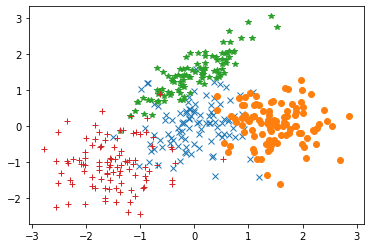

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Data generation
# write your code here
mean=np.array([0,0])
cov=0.3*np.array([[1,0],[0,1]])
x4=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x4[:,0],x4[:,1],"x")

mean=np.array([1.5,0])
cov=0.3*np.array([[1,0],[0,1]])
x2=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x2[:,0],x2[:,1],"o")

mean=np.array([0,1.5])
cov=np.array([[0.3,0.25],[0.25,0.3]])
x3=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x3[:,0],x3[:,1],"*")

mean=np.array([-1.5,-1])
cov=0.4*np.array([[1,0],[0,1]])
x1=np.random.multivariate_normal(mean, cov, 100)
plt.plot(x1[:,0],x1[:,1],"+")

plt.show()

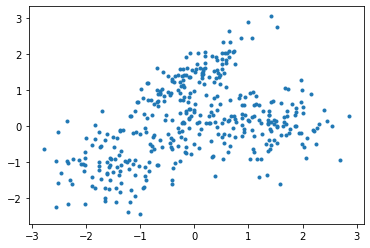

In [4]:
x=np.concatenate((x1,x2,x3,x4), axis=0)
plt.plot(x[:,0],x[:,1],".")

0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->

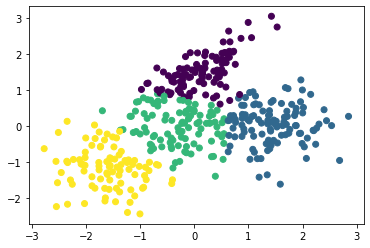

In [6]:
_,_,_,label=K_means_clustering(x,4,20,10**(-20))
plt.scatter(x[:,0], x[:,1],c=label)
plt.show()